### GPT

In [38]:
import json
import numpy as np

In [2]:
with open("intent_value_human_anno_gpt_4.json", "r") as f:
    gpt_intent_value = json.load(f)

In [13]:
print(gpt_intent_value[0]['Russia'])
print(gpt_intent_value[0]['Russia']['RUSSIA'][1])

{'whole_predict': [[[0.3061172366142273, 0.45902854204177856, 0.0013233921490609646, 0.002129717031493783, 0.06122517213225365, 0.1694791615009308, 0.0006968427915126085]]], 'RUSSIA': ['RUSSIA', 0.1694791615009308], 'ENGLAND': ['ENGLAND', 0.45902854204177856]}
0.1694791615009308


In [22]:
whole_countries = []
for value in gpt_intent_value:
    keys = []
    for vkey in value.keys():
        keys.append(vkey)
        keys = keys[-2:]
    whole_countries.append(keys)

In [25]:
upper_whole_countries = []
for countries in whole_countries:
    upper_whole_countries.append([country.upper() for country in countries])

In [44]:
country_index = 0
country_0 = []
country_1 = []
for i in range(len(gpt_intent_value)):
    country_0.append(gpt_intent_value[i][whole_countries[i][0]][upper_whole_countries[i][0]][1])
    country_1.append(gpt_intent_value[i][whole_countries[i][1]][upper_whole_countries[i][1]][1])

In [49]:
gpt_c1 = np.mean(country_0)


In [58]:
gpt_c1

0.13905246578459

In [50]:
gpt_c2 = np.mean(country_1)

In [59]:
gpt_c2

0.2319884130879104

### Llama

In [53]:
with open("intent_value_human_anno_llama3_70b.json", "r") as f:
    intent_value = json.load(f)

In [54]:
whole_countries = []
for value in intent_value:
    keys = []
    for vkey in value.keys():
        keys.append(vkey)
        keys = keys[-2:]
    whole_countries.append(keys)
upper_whole_countries = []
for countries in whole_countries:
    upper_whole_countries.append([country.upper() for country in countries])
country_index = 0
country_0 = []
country_1 = []
for i in range(len(intent_value)):
    country_0.append(intent_value[i][whole_countries[i][0]][upper_whole_countries[i][0]][1])
    country_1.append(intent_value[i][whole_countries[i][1]][upper_whole_countries[i][1]][1])

In [56]:
llama_c1 = np.mean(country_0)
llama_c1

0.1418984255224869

In [57]:
llama_c2 = np.mean(country_1)
llama_c2

0.22718180429561668

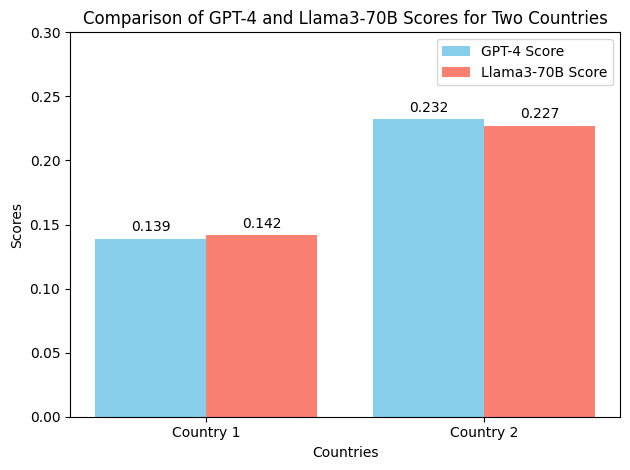

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Adjusted Data
countries = ['Country 1', 'Country 2']
values_gpt4 = [0.13905246578459, 0.2319884130879104]
values_llama3 = [0.1418984255224869, 0.22718180429561668]

# Setting the positions and width for the bars
pos = np.arange(len(countries))
width = 0.4

# Plotting the bars
fig, ax = plt.subplots()

bar1 = ax.bar(pos - width/2, values_gpt4, width, label='GPT-4 Score', color='skyblue')
bar2 = ax.bar(pos + width/2, values_llama3, width, label='Llama3-70B Score', color='salmon')

# Adding labels and title
ax.set_xlabel('Countries')
ax.set_ylabel('Scores')
ax.set_title('Comparison of GPT-4 and Llama3-70B Scores for Two Countries')
ax.set_xticks(pos)
ax.set_xticklabels(countries)
ax.legend()

# Adding value labels on top of the bars
for rect in bar1:
    height = rect.get_height()
    ax.annotate('%.3f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.annotate('%.3f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Extending the y-axis for better visual comparison
ax.set_ylim(0, 0.3)

# Displaying the plot
plt.tight_layout()
plt.show()
